# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.

Необходимо изучить рынок российского кинопроката и выявить текущие тренды. 
В исследовании особое внимание уделено фильмам, которые получили государственную поддержку. Насколько такие фильмы интересны зрителю и окупаются ли они в прокате.
    
В проекте используются данные, опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. Данные представлены в двух таблицах, В ходе проекта будет произведено обьединение датасетов, проведена предобработка данных, исследовательский анализ и проанализированы фильмы, которые получили государственную поддержку.

Описание данных: 
    
Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
-`show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.
    
Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.


### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

#### Шаг 1.1. Просмотр данных датасетов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.1f}'.format # избавимся от экспоненты

In [2]:
data_movies = pd.read_csv ('/datasets/mkrf_movies.csv')

In [3]:
data_shows = pd.read_csv ('/datasets/mkrf_shows.csv')

In [4]:
data_movies.head(pd.set_option('display.max_columns', None))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер"
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
data_shows.head(pd.set_option('display.max_columns', None))

,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"
...,...,...
3153,224014814,"1,530.0"
3154,224021411,"9,270.0"
3155,224022410,400.0
3156,224023210,360.0


In [7]:
data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


#### Шаг 1.2 Объединение данных в один датафрейм


In [8]:
data_movies[data_movies['puNumber'].str.isdigit() == False] #поиск нечисловых значений

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data_movies.loc[804, 'puNumber'] = data_movies.loc[804, 'puNumber'].strip() #удаление пробелов  

In [10]:
data_movies.loc[1797, 'puNumber'] = '0' #замена значения на 0

In [11]:
data_movies['puNumber'] = pd.to_numeric(data_movies['puNumber'])

In [12]:
data = data_movies.merge(data_shows, on='puNumber', how='left') #обьединение таблиц
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.0"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [13]:
data.describe()

,puNumber,refundable_support,nonrefundable_support,budget,box_office
count,"7,486.0",332.0,332.0,332.0,"3,158.0"
mean,"135,178,527.6","11,864,457.8","48,980,988.9","127,229,716.7","76,478,696.2"
std,"38,382,177.4","24,916,555.3","59,980,117.9","188,588,333.1","240,353,122.8"
min,0.0,0.0,0.0,0.0,0.0
25%,"112,025,043.0",0.0,"25,000,000.0","42,000,000.0","86,239.0"
50%,"121,015,464.5",0.0,"30,000,000.0","68,649,916.0","2,327,987.5"
75%,"124,003,313.8","15,000,000.0","40,375,000.0","141,985,319.5","23,979,671.0"
max,"231,001,111.0","180,000,000.0","400,000,000.0","2,305,074,303.0","3,073,568,690.8"


Перед этапом предобработки данных была изучена общая информация о данных датасетов.
Были выявлены и обработаны нечисловые значения в столбце `puNumber`, обьединены таблицы по днныму полю и проведена проверка данных.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверка типов данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [14]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [15]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [16]:
data['ratings'] = data['ratings'].replace('\%', '', regex = True)

In [17]:
data['ratings']= data['ratings'].astype('float64') 

In [18]:
data.loc[data['ratings'] > 10, 'ratings'] = data['ratings']/10

In [19]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Изменены типы данных в колонках:
- show_start_date — приведены к Datetime 
- ratings — переведены проценты в float

#### Шаг 2.2. Изучение пропусков в датафрейме

In [21]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Необходимо заполнить пропуски в данных, чтобы анализ был более корректный:

- film_studio - пропущенные данные нельзя определить, оставляем как есть;
- production_country - замена на данные из открытых источников;
- director, producer, genres - данные не критичны для анализа, оставляем пропуски;
- refundable_support, nonrefundable_support, budget - пропуски почти во всей таблице, данные фильмы не были профинансированы государством, заменяем пропуски на 0 (нет финансирования) для удобства расчета;
- ratings - не все фильмы имеют оценки, оставляем пропуски;
- box_office - столбец из другого датасета, перенесены все данные, оставляем пропуски, заменяем NaN на 0.

In [22]:
data.loc[data['film_studio'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.0"
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data.loc[data['production_country'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия","194,527.0"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [24]:
data.loc[3185, 'production_country'] = 'Россия'
data.loc[4440, 'production_country'] = 'Россия'

In [25]:
data['box_office'] = data['box_office'].fillna(value=0)

In [26]:
data['budget'] = data['budget'].fillna(value=0)

In [27]:
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(value=0)

In [28]:
data['refundable_support'] = data['refundable_support'].fillna(value=0)

In [29]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                      0
financing_source         7154
ratings                   967
genres                    976
box_office                  0
dtype: int64

#### Шаг 2.3. Изучение дубликатов в датафрейме

In [30]:
data.duplicated().sum()

0

In [31]:
data.loc[data['title'].duplicated(keep=False)].sort_values(by='title')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,6.1,комедия,0.0
454,100 миллионов евро,221024616,2016-05-25 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,6.1,комедия,0.0
4852,127 часов,121000811,2011-01-27 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.7,"триллер,биография,драма",0.0
5058,127 часов,221069011,2011-05-18 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.7,"триллер,биография,драма",0.0
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,0.0,0.0,0.0,NaN,6.7,"боевик,триллер,драма",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505,Я ненавижу день святого Валентина,221139210,2010-12-03 12:00:00+00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,5.0,"мелодрама,комедия",0.0
1704,"Я, снова я и мама",121030213,2013-11-21 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,6.3,"комедия,мелодрама,драма",0.0
1703,"Я, снова я и мама",121013116,2016-05-23 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,6.3,"комедия,мелодрама,драма",0.0
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,0.0,0.0,0.0,NaN,NaN,NaN,0.0


In [32]:
data[data.duplicated(subset=['puNumber'], keep = False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.0,"мелодрама,комедия",0.0
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.6,"драма,мелодрама,история",0.0
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,0.0,NaN,7.4,"комедия,криминал",0.0
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,0.0,NaN,6.8,"комедия,криминал",0.0


- Повторы в title связаны с тем, что фильмы вышли в разное время с разным номером прокатного удостоверения - не изменяем;
- Есть две строчки с одинаковым номером прокатного удостоверения, но разными фильмами - возможно это случайная ошибка (человеческий фактор) - не изменяем

In [33]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [34]:
data['production_country'] = (data['production_country'].replace([' - '], '-', regex=True))

In [35]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания-Италия', 'Чехословакия',
       'США-Франция-Турция', 'Новая Зеландия', 'Канада-Франция-Испания',
       'США-Германия', 'США-Великобритания', 'Великобритания',
       'Франция-Мексика-США', 'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США-Франция', 'США-Япония-Франция-Великобритания',
       'Гонконг-Сингапур-Таиланд-Великобритания', 'США-Канада',
       'Франция-Италия-Великобритания-США', 'Франция-США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США-Бельгия', 'США-Ирландия-Великобритания', 'Великобритания-США',
       'Люксембург-Нидерланды-Испания-Великобритания-США-Италия',
       'Великобритания-Франция-США', 'Н

In [36]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [37]:
data['genres'] = (data['genres'].replace([' '], '', regex=True))

In [38]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

Чтобы убрать неявные дубликаты убраны пробелы в ячейках 'genres' и 'production_country'

#### Шаг 2.4. Изучение категориальных значений

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [39]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [40]:
data['type'] = data['type'].str.strip()

In [41]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [42]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [43]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

В столбце type убраны одинаковые значения

В столбцах age_restriction и financing_source данные уникальны

В категориальных столбцах встречаются пробелы, которые влияют на распространение неявных дубликатов - это общая проблема для многих столбцов.

#### Шаг 2.5. Проверка количественных значений

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [44]:
budget_not = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
budget_not

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,"23,000,000.0",0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,"10,234,016.1"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"75,000,000.0",0.0,Фонд кино,6.6,драма,"446,163,511.0"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.0","70,000,000.0",0.0,Фонд кино,7.8,"боевик,драма,криминал","196,572,438.4"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.0",0.0,0.0,Фонд кино,6.2,"комедия,фэнтези","67,418,974.8"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.0","100,000,000.0",0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези","184,487,551.4"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,"59,000,000.0",0.0,Фонд кино,6.3,"комедия,драма","1,957,738.5"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"35,000,000.0",0.0,Фонд кино,5.1,"комедия,мелодрама","72,937,783.2"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,"6,000,000.0",0.0,Министерство культуры,4.3,комедия,"15,362,931.4"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.0","51,000,000.0",0.0,Фонд кино,6.3,"комедия,мелодрама","70,299,052.0"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,"250,000,000.0",0.0,Фонд кино,5.6,фантастика,"1,038,321,489.0"


В данных есть фильмы, которые получали невозвратные и возвратные средства государственной поддержки, но их бюджет равен 0. Заменим нули на сумму средств гос. поддержки.

In [45]:
budget_median  = round(data.eval('(refundable_support + nonrefundable_support) / budget').median(), 2)
budget_median * 100

61.0

Процент гос. поддерки примерно составлял 61%. 
Заполним недостающие данные в колонке бюджет

In [46]:
data.loc[budget_not.index, 'budget'] = (data.loc[budget_not.index, 'refundable_support'] + data.loc[budget_not.index, 'nonrefundable_support']) / budget_median
data.loc[budget_not.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,"23,000,000.0","37,704,918.0","Министерство культуры, Фонд кино",6.6,мелодрама,"10,234,016.1"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"75,000,000.0","122,950,819.7",Фонд кино,6.6,драма,"446,163,511.0"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.0","70,000,000.0","131,147,541.0",Фонд кино,7.8,"боевик,драма,криминал","196,572,438.4"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.0",0.0,"32,786,885.2",Фонд кино,6.2,"комедия,фэнтези","67,418,974.8"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.0","100,000,000.0","262,295,082.0",Фонд кино,4.6,"мультфильм,приключения,фэнтези","184,487,551.4"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,"59,000,000.0","96,721,311.5",Фонд кино,6.3,"комедия,драма","1,957,738.5"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"35,000,000.0","57,377,049.2",Фонд кино,5.1,"комедия,мелодрама","72,937,783.2"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,"6,000,000.0","9,836,065.6",Министерство культуры,4.3,комедия,"15,362,931.4"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.0","51,000,000.0","114,754,098.4",Фонд кино,6.3,"комедия,мелодрама","70,299,052.0"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,"250,000,000.0","409,836,065.6",Фонд кино,5.6,фантастика,"1,038,321,489.0"


В ходе исследования количественных значений обнаружено, что есть фильмы, которые получали средства государственной поддержки, но их бюджет равен 0. Данные значения были замены на сумму средств гос. поддерки с учетом медианной доли от общего бюджета.

#### Шаг 2.6. Добавление новых столбцов




- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [47]:
data['year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [48]:
data['main_director'] = data['director'].str.split(",").str[0]

In [49]:
data['main_director'] = data['main_director'].str.strip()

In [50]:
data['main_genre'] = data['genres'].str.split(",").str[0]

In [51]:
data['main_genre'] = data['main_genre'].str.strip()

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [52]:
data['support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [53]:
data.query('budget > 0').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,"26,500,000.0","79,411,900.0",Министерство культуры,8.1,"драма,мелодрама","365,353.6",2013,А.Атанесян,драма,0.3
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,"26,000,000.0","37,142,857.0",Министерство культуры,NaN,NaN,"28,140.0",2014,А.Якимчук,NaN,0.7
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,"107,847,945.0","176,023,490.0",Фонд кино,5.3,"комедия,фантастика","19,957,031.5",2013,Р.Давлетьяров,комедия,0.6
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,"28,000,000.0","40,574,140.0",Министерство культуры,4.2,драма,"55,917.5",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.7
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,"25,000,000.0","40,015,122.0",Министерство культуры,6.4,драма,"232,100.0",2014,М.Угаров,драма,0.6
1854,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.0,"25,000,000.0","51,850,000.0",Министерство культуры,6.1,"мультфильм,фэнтези,история","15,078,858.6",2015,С.Серегин,мультфильм,0.5
1870,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,"50,000,000.0","100,000,000.0","220,588,394.0",Фонд кино,8.5,"драма,военный,история","249,166,767.7",2015,Р.Давлетьяров,драма,0.7
1871,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.0,"46,502,299.0","86,210,067.0","Министерство культуры, Фонд кино",6.7,драма,"4,731,239.5",2014,В.Глаголева,драма,0.5
1903,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.0,"75,000,000.0","139,551,503.0",Фонд кино,7.0,"триллер,боевик,приключения","352,804,320.4",2015,А.Войтинский,триллер,0.5
1912,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.0,"34,000,000.0","48,571,430.0",Министерство культуры,7.4,"фэнтези,приключения,драма","51,907.5",2015,Д.Федоров,фэнтези,0.7


### Шаг 3. Проведение исследовательского анализа данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [54]:
data_pivot = data.query('box_office > 0').pivot_table(index='year', values='box_office', aggfunc='count')
data_pivot = data_pivot.set_axis(['Вышло в прокат'], axis='columns')
data_pivot['Фильмов за год'] = data.pivot_table(index='year', values='box_office', aggfunc='count')['box_office']
data_pivot['Процент проката'] = data_pivot['Вышло в прокат'] / data_pivot['Фильмов за год']  * 100
data_pivot

,Вышло в прокат,Фильмов за год,Процент проката
year,,,
2010,101,985,10.3
2011,109,622,17.5
2012,123,593,20.7
2013,179,630,28.4
2014,273,807,33.8
2015,462,705,65.5
2016,525,818,64.2
2017,357,505,70.7
2018,475,891,53.3


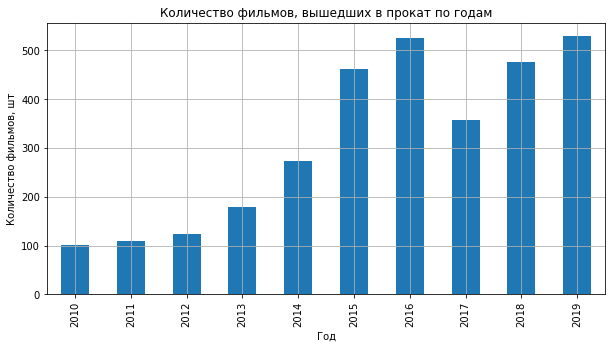

In [55]:
data_pivot.plot(kind='bar', y='Вышло в прокат', figsize=(10, 5), grid=True, legend=False);
plt.title('Количество фильмов, вышедших в прокат по годам');
plt.xlabel('Год');
plt.ylabel('Количество фильмов, шт');

Кол-во фильмов в прокате росло каждый год. В 2010 году в прокат вышел 101 фильм, каждый год кол-во фильмов увеличивалось, несмотря на спад в 2017 году, в 2019 достигло 530 шт. С 2010 по 2019 год процент вышедших в прокат фильмов увеличился с 10% до 56%

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

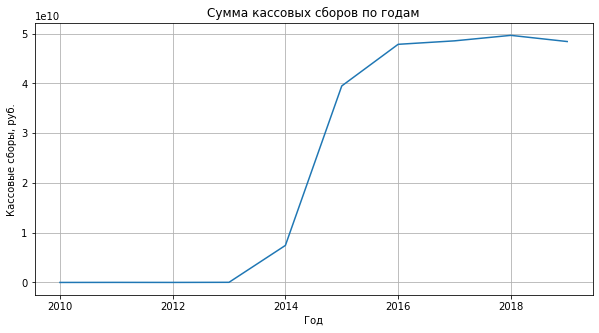

In [56]:
(
    data.query('box_office > 0').pivot_table(index='year', values='box_office', aggfunc='sum')
    .plot(kind='line', figsize=(10, 5), legend=False, grid=True)
)
plt.title('Сумма кассовых сборов по годам');
plt.xlabel('Год');
plt.ylabel('Кассовые сборы, руб.');

Сумма сборов была минимальной с 2010 по 2013 гг., а максимальной в 2018 году (сумма сборов почти равна 50 млрд руб.), с ростом кол-ва фильмов стали расти и кассовые сборы.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [57]:
data.groupby('year')['box_office'].agg(['median','mean'])

,median,mean
year,,
2010,0.0,"2,465.6"
2011,0.0,"22,673.3"
2012,0.0,"11,729.2"
2013,0.0,"47,301.1"
2014,0.0,"9,225,467.0"
2015,"739,938.0","56,024,631.5"
2016,"479,832.5","58,516,258.9"
2017,"2,522,174.0","96,165,756.9"
2018,"289,040.0","55,744,560.2"


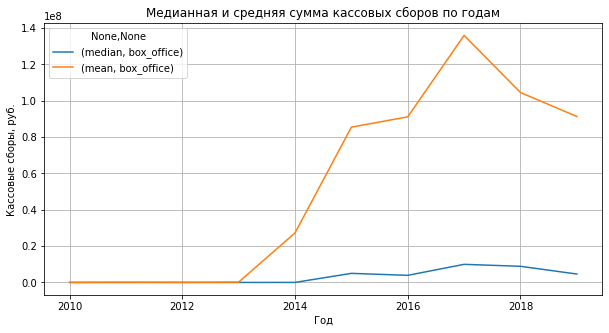

In [58]:
(
    data.query('box_office > 0').pivot_table(index='year', values='box_office', aggfunc=['median', 'mean'])
    .plot(kind='line', y=['median', 'mean'], figsize=(10, 5), legend=True, grid=True)
)
plt.title('Медианная и средняя сумма кассовых сборов по годам');
plt.xlabel('Год');
plt.ylabel('Кассовые сборы, руб.');

Медиана и среднее значение оставались одинаковыми до 2013 года, далее при резком росте кол-ва фильма проката среднее стало расти, а медиана осталась невысокой, что связано с тем, что фильмы имею разные кассовые сборы. 
В 2017 году среднее значение сборов было максималым.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

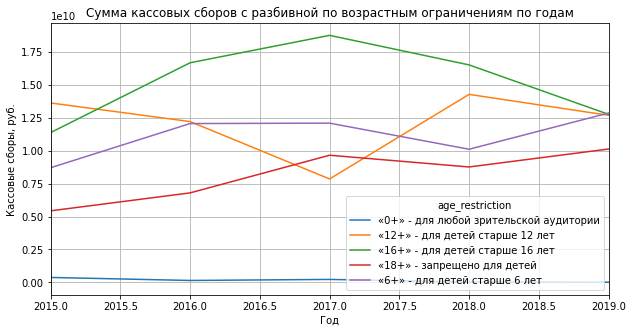

In [59]:
(
    data.query('box_office > 0')
    .pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')
    .plot(kind='line', xlim=[2015, 2019], figsize=(10, 5), legend=True, grid=True)
)
plt.title('Сумма кассовых сборов с разбивной по возрастным ограничениям по годам');
plt.xlabel('Год');
plt.ylabel('Кассовые сборы, руб.');

In [60]:
data.query('year >= 2015').groupby('age_restriction')['box_office'].sum()

age_restriction
«0+» - для любой зрительской аудитории      809,077,426.0
«12+» - для детей старше 12 лет          60,619,446,628.3
«16+» - для детей старше 16 лет          76,034,733,643.6
«18+» - запрещено для детей              40,759,615,572.1
«6+» - для детей старше 6 лет            55,798,610,799.7
Name: box_office, dtype: float64

Лидером сборов является категория 16+, несмотря на спад с 2017 года, который может быть связан с присвоением большинства фильмов категории 12+. Категории 6+, 12+, 16+ наиболее популярны, так как расчитаны на широкую аудитории, чпем фильмы категории 0+ и 18+.


### Шаг 4. Исследование фильмов, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [61]:
source = ['Министерство культуры', 'Фонд кино', 'Министерство культуры, Фонд кино'] 

In [62]:
#фильмы сняты с гос. поддержкой без сборов
data.query('budget != 0 and box_office == 0 and financing_source in @source' )['title'].count()

14

In [63]:
#фильмы сняты с гос. поддержкой со сборами
data.query('budget != 0 and box_office != 0 and financing_source in @source' )['title'].count()

318

Проекты сняты при поддержке Министерства культуры или Фонда кино без информации о сборах = 14

Проекты сняты при поддержке Министерства культуры или Фонда кино с информацией о сборах = 318

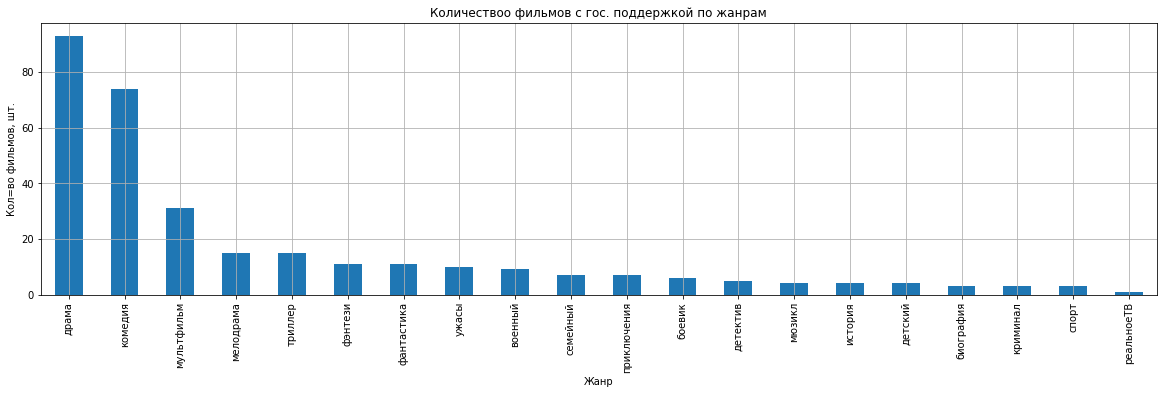

In [64]:
data.query('financing_source in @source')['main_genre'].value_counts().plot(kind='bar', grid=True, figsize=(20, 5));
plt.title('Количествоо фильмов с гос. поддержкой по жанрам');
plt.xlabel('Жанр');
plt.ylabel('Кол=во фильмов, шт.');

Большинство поддерживаемых фильмов относиться к жанрам драма и комедия

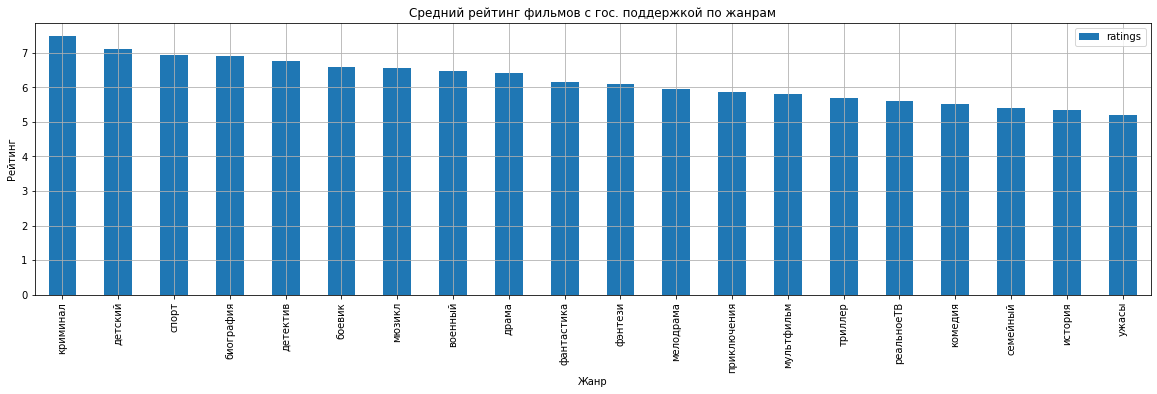

In [65]:
(
    data.query('financing_source in @source')[['main_genre', 'ratings']]
    .groupby('main_genre').agg('mean').sort_values(by='ratings', ascending=False)
    .plot(kind='bar', grid=True, figsize=(20, 5))
)
plt.title('Средний рейтинг фильмов с гос. поддержкой по жанрам');
plt.xlabel('Жанр');
plt.ylabel('Рейтинг');

У фильмов в жанре криминал и деткий рейтинг выше 7, а у жанра ужасы самая низкая оценка

In [66]:
#кол-во фильмов с гос. поддержкой по возрастному ограничению
data.query('financing_source in @source')['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           125
«12+» - для детей старше 12 лет           106
«6+» - для детей старше 6 лет              65
«18+» - запрещено для детей                28
«0+» - для любой зрительской аудитории      8
Name: age_restriction, dtype: int64

Большинство фильмом снятых с гос. поддержкой имеют возрастное ограничение 16+, таких фильмов было выпущено больше всего. 

In [67]:
#кол-во фильмов с гос. поддержкой по типу
data.query('financing_source in @source')['type'].value_counts()

Художественный    300
Анимационный       31
Документальный      1
Name: type, dtype: int64

Большинство фильмов относится к художественным

In [68]:
#общая сумма гос. поддержки
data['support_sum'] = (data['refundable_support'] + data['nonrefundable_support'])

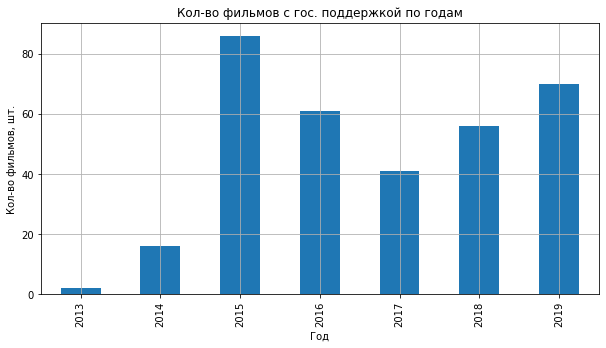

In [69]:
(
    data.query('financing_source in @source')
    .groupby('year')['support_sum']
    .count().plot(kind='bar', grid=True, figsize=(10, 5))
)
plt.title('Кол-во фильмов с гос. поддержкой по годам');
plt.xlabel('Год');
plt.ylabel('Кол-во фильмов, шт.');

- В 2013 и 2014 году кол-во профинансированых фильмов было меньше 18
- Самое большое кол-во фильмов было профинансировано в 2015 году (86 фильмов)
- В последующие годы кол-во фильмов с поддержкой варьировалось от 61 до 70

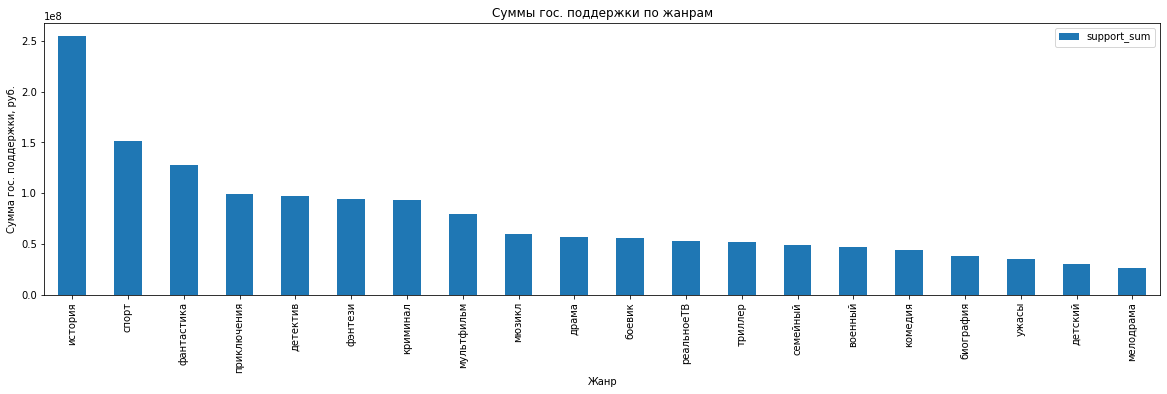

In [70]:
(
    data.query('financing_source in @source')
    .pivot_table(index= 'main_genre', values = ['support_sum'])
    .sort_values(by='support_sum',ascending=False).plot(kind='bar', figsize=(20, 5))
)
plt.title('Суммы гос. поддержки по жанрам');
plt.xlabel('Жанр');
plt.ylabel('Сумма гос. поддержки, руб.');

Больше всего средств выделяется на жанры история, спорт и фантастика , меньше всего на мелодрамы и детские фильмы

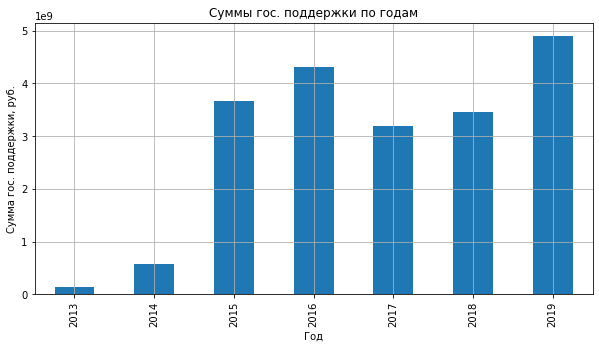

In [71]:
(
    data.query('financing_source in @source')
    .groupby('year')['support_sum'].agg(['sum'])
    .plot(kind='bar', grid=True, legend=False, figsize=(10, 5))
)
plt.title('Суммы гос. поддержки по годам');
plt.xlabel('Год');
plt.ylabel('Сумма гос. поддержки, руб.');

В 2013 и 2014 выделялось меньше всего средст на финансирование фильмов, затем суммы гос. поддержки резко увеличились и в 2019 году достигли максимального значения

In [72]:
#окупаемость
data['profit'] = data['box_office'] - data['budget']

In [73]:
data.query('financing_source in @source')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,support,support_sum,profit
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,"26,500,000.0","79,411,900.0",Министерство культуры,8.1,"драма,мелодрама","365,353.6",2013,А.Атанесян,драма,0.3,"26,500,000.0","-79,046,546.4"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,"26,000,000.0","37,142,857.0",Министерство культуры,NaN,NaN,"28,140.0",2014,А.Якимчук,NaN,0.7,"26,000,000.0","-37,114,717.0"
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,"107,847,945.0","176,023,490.0",Фонд кино,5.3,"комедия,фантастика","19,957,031.5",2013,Р.Давлетьяров,комедия,0.6,"107,847,945.0","-156,066,458.5"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,"28,000,000.0","40,574,140.0",Министерство культуры,4.2,драма,"55,917.5",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.7,"28,000,000.0","-40,518,222.5"
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,"25,000,000.0","40,015,122.0",Министерство культуры,6.4,драма,"232,100.0",2014,М.Угаров,драма,0.6,"25,000,000.0","-39,783,022.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.0","400,000,000.0","980,000,000.0",Фонд кино,6.0,"история,биография,драма","717,703,185.5",2019,А.Кравчук,история,0.5,"500,000,000.0","-262,296,814.5"
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.0",0.0,"190,000,000.0",Фонд кино,6.7,"мультфильм,приключения,семейный","501,069,235.0",2019,Д.Шмидт,мультфильм,0.5,"100,000,000.0","311,069,235.0"
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.0","400,000,000.0","944,000,000.0",Фонд кино,5.7,"фантастика,боевик",0.0,2019,Ф.Бондарчук,фантастика,0.5,"500,000,000.0","-944,000,000.0"
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,"30,000,000.0","46,154,000.0",Министерство культуры,5.9,драма,0.0,2019,И.Северов,драма,0.6,"30,000,000.0","-46,154,000.0"


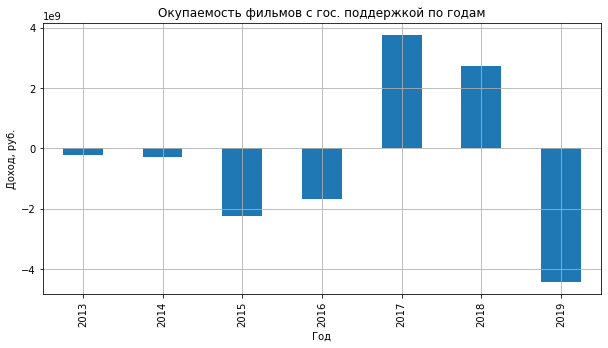

In [74]:
data.query('financing_source in @source').groupby('year')['profit'].sum().plot(kind='bar', grid=True, figsize=(10, 5));
plt.title('Окупаемость фильмов с гос. поддержкой по годам');
plt.xlabel('Год');
plt.ylabel('Доход, руб.');

Фильмы с поддержкой окупились только в 2017 и 2018 годах.

### Шаг 5. Напишите общий вывод

В ходе исследования рынка российского кинопроката была выполнена следующая предобработка данных:
- обьединены два датасета;
- изучена общая информация о данных;
- найдены и обработаны пропущенные значения (пропуски могли возникнуть из-за человеческого фактора (данные были удалены случайно или намерено, сотрудник не внес данные) или в результате сбоя в базе данных при выгрузке);
- изменены некорректные типы данных в столбцах (в столбцах show_start_date — приведен к Datetime, а ratings — переведены проценты в float);
- изучены уникальные значения и устранены неявные дубликаты;
- изучены категориальные и количественные значения: убраны неявные дубликаты и скорректированы значения;
- добавлены столбцы с параметрами: год проката, имя и фамилия главного режиссёра и основной жанр фильма;
- проведен расчет доли гос. поддержки от общего бюджета фильма.

В ходе исследовательского анализа данных были изучены и описаны параметры объектов и сделаны следующие выводы:

- Кол-во фильмов в прокате росло каждый год. В 2010 году в прокат вышел 101 фильм, каждый год кол-во фильмов увеличивалось, несмотря на спад в 2017 году, в 2019 достигло 530 шт. С 2010 по 2019 год процент вышедших в прокат фильмов увеличился с 10% до 56%;
- Сумма сборов была минимальной с 2010 по 2013 гг., а максимальной в 2018 году (сумма сборов почти равна 50 млрд. руб.), с ростом кол-ва фильмов стали расти и кассовые сборы;
- Медиана и среднее значение оставались одинаковыми до 2013 года, далее при резком росте кол-ва фильма проката среднее стало расти, а медиана осталась невысокой, что связано с тем, что фильмы имею разные кассовые сборы. В 2017 году получен максимальный показатель;
- Лидером сборов является категория 16+, несмотря на спад с 2017 года, который мог быть связан с присвоением большинства фильмов категории 12+. Категории 6+, 12+, 16+ наиболее популярны, так как расчитаны на широкую аудитории, чем фильмы категории 0+ и 18+.

Исследование фильмов, которые получили государственную поддержку показало:

- Количество фильмов, снятых с гос. поддержкой составляет 4,4% от всех фильмов, выпущенных в прокат за весь период;
- Большинство поддерживаемых фильмов относиться к жанрам драма и комедии;
- У фильмов в жанре криминал и деткий рейтинг выше 7, а у жанра ужасы самая низкая оценка;
- Большинство фильмом снятых с гос. поддержкой имеют возрастное ограничение 16+, таких фильмов было выпущено больше всего;
- Большинство фильмов относится к художественным;
- В 2015 году было профинансировано 86 фильмов, в последующие годы кол-во фильмов с поддержкой варьировалось от 61 до 70;
- Больше всего средств выделяется на жанры история, спорт и фантастика , меньше всего на мелодрамы и детские фильм;
- В 2013 и 2014 выделялось меньше всего средств на финансирование фильмов, затем суммы гос. поддержки резко увеличились и в 2019 году достигли максимального значения;
- Фильмы с гос. поддержкой окупились только в 2017 и 2018 годах.
